STATISTICS EXCERCISES MODULE

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [2]:
food = pd.read_excel(r'./food_consumption.xlsx')
food.head()

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

# Es.1

In [3]:
food_stats=food.groupby('food_category')['consumption'].describe()
food_stats.sort_values(by=['50%'], ascending = 0, inplace = True)
food_stats

# dairy food category has the highest median value of food consumption

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
wheat,130.0,71.549538,44.191318,2.74,37.0450,69.420,103.3725,197.50
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03


2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

# Es.2

<AxesSubplot: xlabel='co2_emission', ylabel='food_category'>

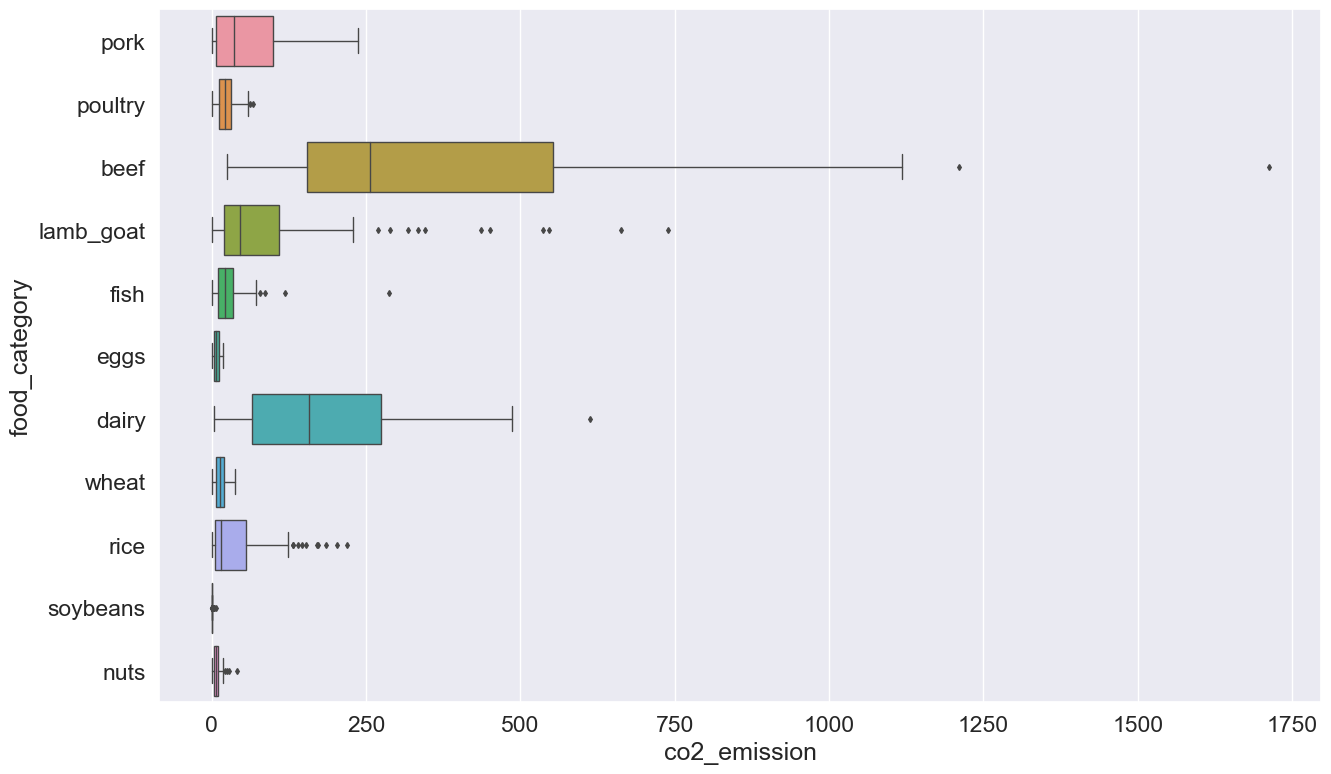

In [4]:
sns.boxplot(x = 'co2_emission', y = 'food_category', data = food, fliersize=3, linewidth=1)

# beef is the food category with the highest IQR

In [5]:
# food_co2=food.groupby('food_category')['co2_emission'].describe()
# food_co2['delta']=food_co2['75%']-food_co2['25%']
# food_co2

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

# Es.3

In [6]:
food_md =food.groupby('food_category')['co2_emission'].describe()
food_md.sort_values(by=['50%'], ascending = 0, inplace = True)
food_md
# food.groupby('food_category')['consumption'].describe()
# beef is also the food category of highest median related to co2 emissions

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
beef,130.0,374.102000,297.906710,24.07,154.2150,255.655,553.5925,1712.00
dairy,130.0,179.153846,132.935669,4.33,65.2275,158.075,274.5000,613.57
lamb_goat,130.0,91.056769,128.356996,0.00,19.6100,46.405,108.6475,739.62
pork,130.0,57.070077,55.632396,0.00,7.3950,36.650,99.9150,237.54
fish,130.0,27.601692,30.358481,0.38,9.6225,22.270,34.8925,286.94
poultry,130.0,22.793538,15.653332,0.50,11.7200,21.325,31.9500,67.14
rice,130.0,37.591615,47.763754,1.22,6.0425,15.200,55.5925,219.76
wheat,130.0,13.644462,8.427570,0.52,7.0650,13.240,19.7100,37.66
eggs,130.0,7.499615,4.622966,0.15,3.6225,7.735,11.3075,17.59


4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

# Es.4

In [7]:
#alpha level=5%
mu_pfc = np.mean(food[food.food_category=='poultry']['consumption'])
mu_ffc = np.mean(food[food.food_category=='fish']['consumption'])
mu_obs = mu_pfc-mu_ffc
mu_obs

3.9321538461538488

In [8]:
food2 = food.loc[(food['food_category']=='fish')|(food['food_category']=='poultry')].drop(columns=['country','co2_emission']).reset_index(drop=True)
food2

,food_category,consumption
0,poultry,38.66
1,fish,4.36
2,poultry,46.12
3,fish,17.69
4,poultry,13.23
...,...,...
255,fish,25.65
256,poultry,8.91
257,fish,4.13
258,poultry,1.40


In [9]:
mu_samples = []
np.random.seed(1)
n=2000
for i in range(n):
    f_sample1=food2.sample(frac=0.5, replace=False)
    ix2 = set(food2.index) - set(f_sample1.index)
    f_sample2 = food2.iloc[list(ix2)]
    mu_diff_samp = np.mean(f_sample1['consumption']) - np.mean(f_sample2['consumption'])
    mu_samples.append(mu_diff_samp)


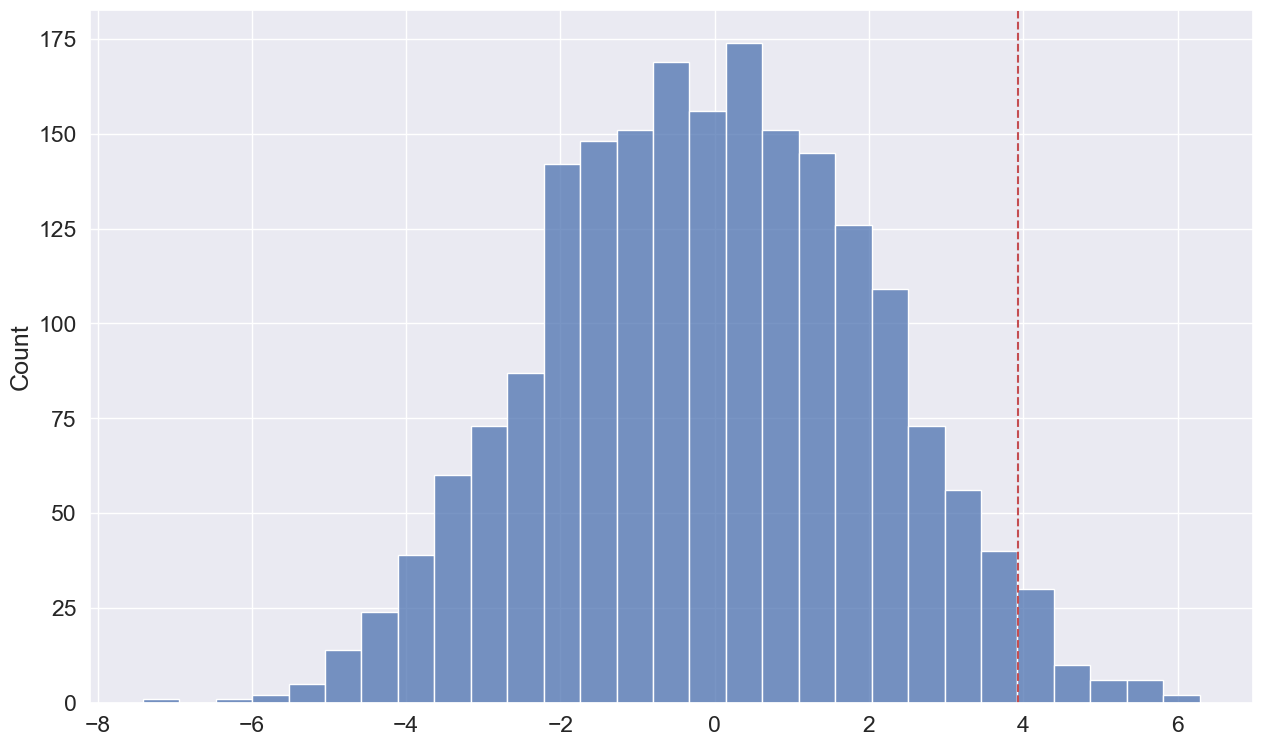

mu_obs 3.93


In [10]:
sns.histplot(mu_samples)
plt.axvline(mu_obs, 0, 1, color='r', linestyle='--')
plt.show()
print('mu_obs', round(mu_obs, 2))

In [11]:
print('sum of extreme values: ', sum([el >= mu_obs for el in mu_samples]))
p_value = sum([el > mu_obs for el in mu_samples])/n
print('p-value:', p_value)

sum of extreme values:  54
p-value: 0.027


In [12]:
# the p-value of 0.027 is lower than the alpha error level, so we can reject H0 since p-value is the probability that 
# the intial value observed is verified under null hypothesis, in this case that there's not a significative difference between
# the mean of poultry and the mean of fish in terms of consumption.

### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents. 

In [13]:
import statsmodels.api as sm


In [14]:
happy = pd.read_excel(r'./Final assignment PT2/world_happiness.xlsx')
happy.head()
# happy.info()
# happy.describe()


,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)* 

# Es.5

<function matplotlib.pyplot.show(close=None, block=None)>

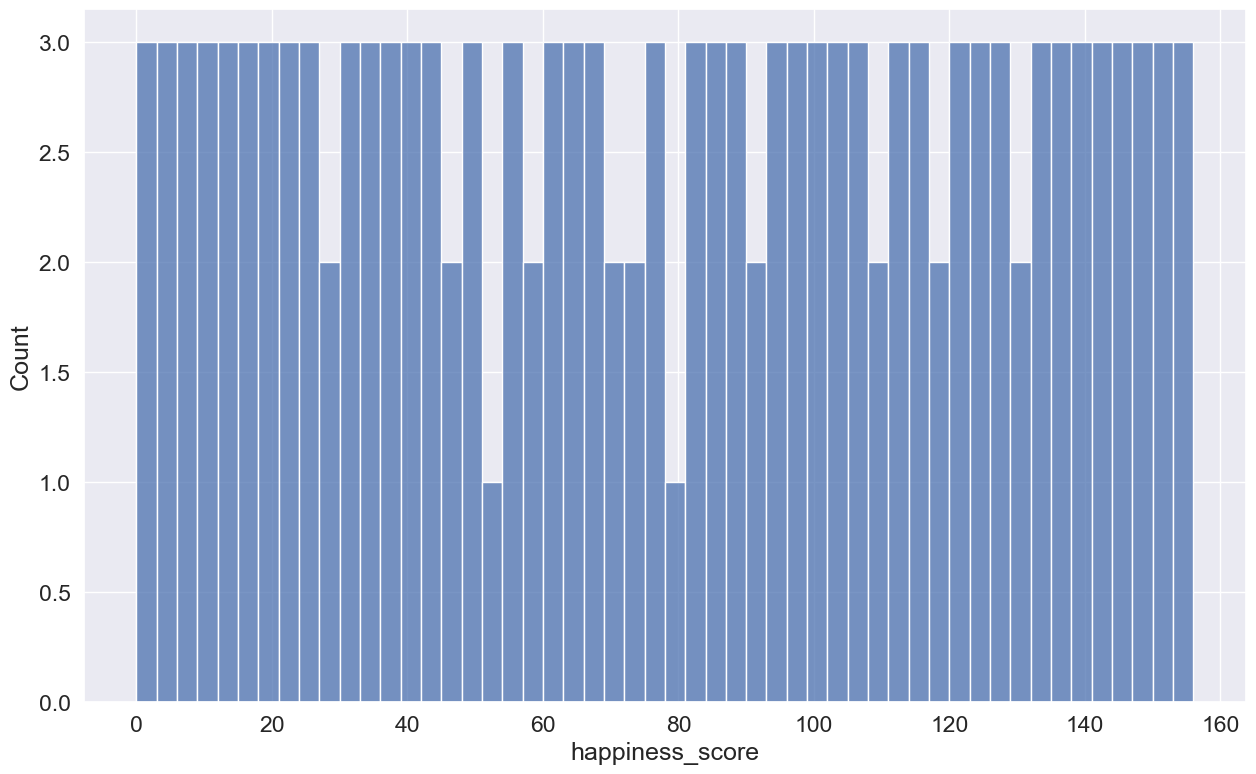

In [15]:
sns.histplot(data=happy, x='happiness_score',binwidth=3)
plt.show

# it looks like uniform distribution

6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

# Es.6

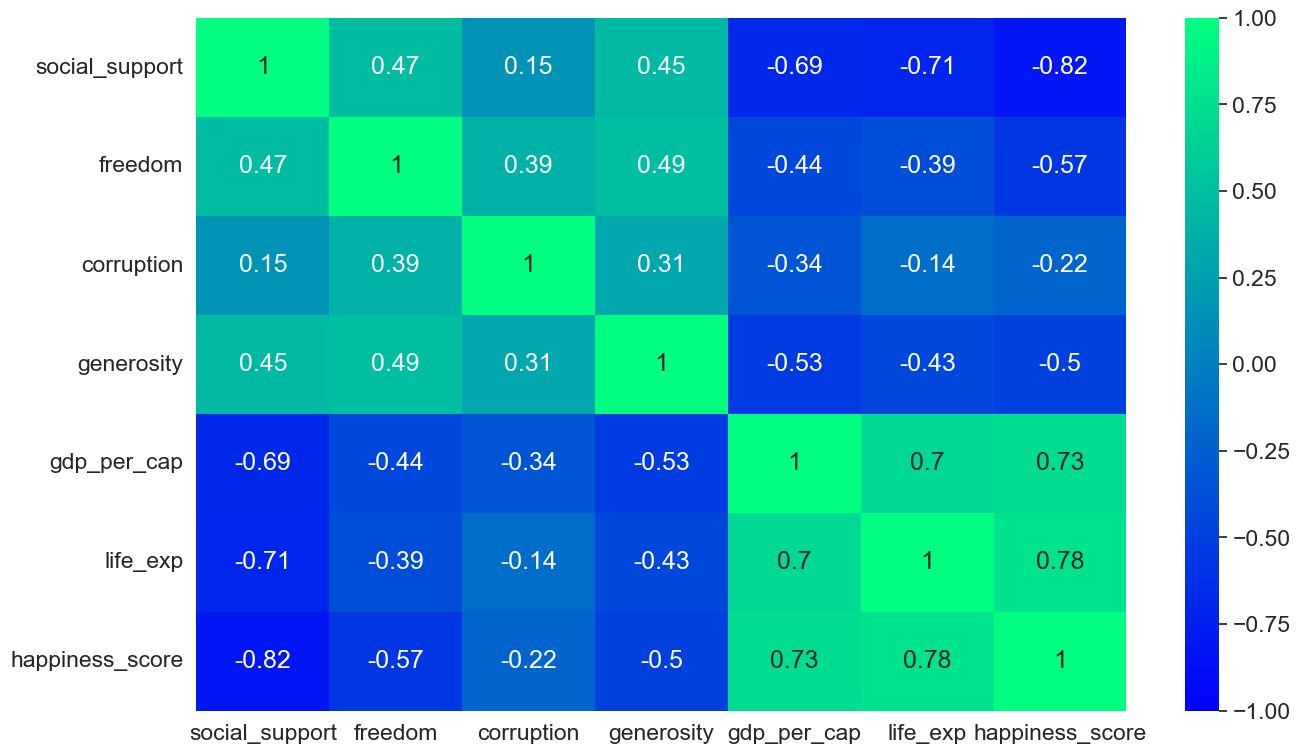

In [16]:
happy.corr(numeric_only=True)
sns.heatmap(happy.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='winter')
plt.show()

# the least correlated variable with the happines_score metric is corruption -0,22 corr

7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

# Es.7

In [17]:
np.array(happy['corruption'])
happy['corruption'].isnull().sum()

# 8

8

In [18]:
happy['corruption'] = happy['corruption'].fillna(np.mean(happy['corruption']))
# np.array(happy['corruption'])

8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

# Es.8 - please uncomment and run. Variables are repeated in Es.9

In [19]:
# X = happy['life_exp']
# y = happy['happiness_score']
# X = sm.add_constant(data=X)
# model_lr=sm.OLS(endog=y,exog=X)
# results_lr = model_lr.fit()
# results_lr.summary()

In [20]:
# 1-year increase in life expectancy corresponds to an increase of 5 points of the happiness score variable

9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer. 

# Es.9

In [21]:
X = happy[['social_support', 'freedom', 'generosity','life_exp']]
y = happy['happiness_score']
X = sm.add_constant(data=X)

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [24]:
# model = sm.OLS(y_train,X_train)
# results = model.fit()

In [25]:
# results.summary()

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [28]:
ssr_train = np.sum((y_train - y_pred)**2)
sst_train = np.sum((y_train - np.mean(y_train))**2)
rsq_train = 1 - (ssr_train/sst_train)
print('R-squared of test set:', rsq_train)

R-squared of test set: 0.7848873839014491


In [29]:
ssr_test = np.sum((y_test - y_test_pred)**2)
sst_test = np.sum((y_test - np.mean(y_test))**2)
rsq_test = 1 - (ssr_test/sst_test)
print('R-squared of test set:', rsq_test)

R-squared of test set: 0.7772372395041665


In [30]:
# No I would not say it is not overfitted, because the training and test R2 are similar about 0.78, and adding more variables to the model
# in comparison to Es.8, the fitting of the model has increased of almost 2 points. 
# If the R2 was 1 I would say that there's overfitting in the model

10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

# Es.10

In [31]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [32]:
print('Naïve Testing MAE:', mae(y_test, np.mean(y_test)))
print('Testing MAE:', mae(y_test, y_test_pred)) 

Naïve Testing MAE: 39.94
Testing MAE: 17.54


In [33]:
# looking at the MAE results of test and training set it seems that there's overfitting of the model because there is a high 
# difference between the two indexes

### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?** (answer here, not on the response Google Sheet)

# Es.11

In [34]:
happy[['social_support', 'freedom', 'generosity','life_exp']].corr()

,social_support,freedom,generosity,life_exp
social_support,1.000000,0.470893,0.449225,-0.705512
freedom,0.470893,1.000000,0.493207,-0.388856
generosity,0.449225,0.493207,1.000000,-0.433144
life_exp,-0.705512,-0.388856,-0.433144,1.000000


In [35]:
#I think that all the coefficients are quite correlated. Multicollinearity is not good because
# it means that the independend variables are dependend (correlated) among each other. The model is not reliable.

12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.** 

# Es.12

Importing plotly failed. Interactive plots will not work.
17:10:17 - cmdstanpy - INFO - Chain [1] start processing
17:10:17 - cmdstanpy - INFO - Chain [1] done processing


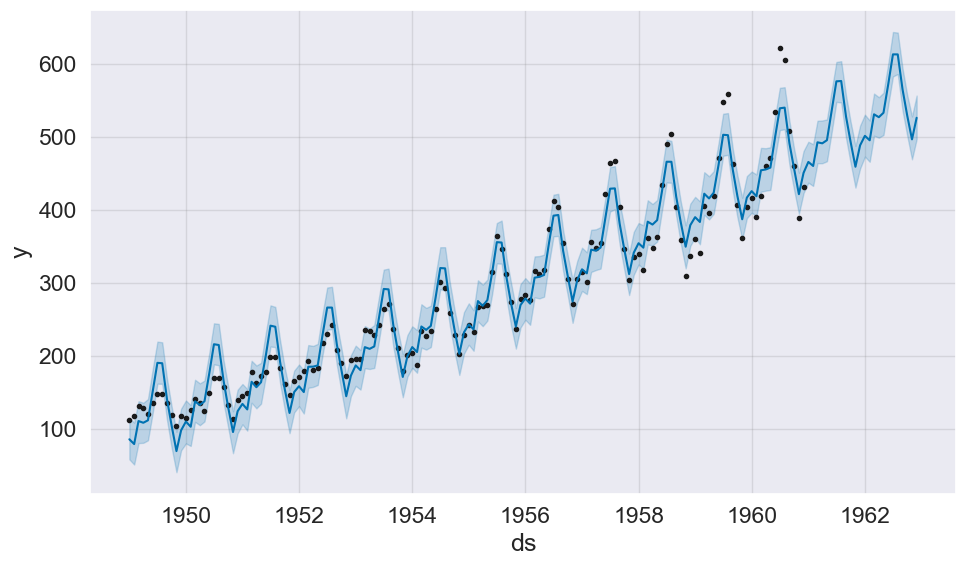

In [36]:
# DO NOT DELETE >>> RUN THIS CELL!

from prophet import Prophet

df = pd.read_excel('./Final ass.Bonus/air-passengers.xlsx')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

17:10:18 - cmdstanpy - INFO - Chain [1] start processing
17:10:18 - cmdstanpy - INFO - Chain [1] done processing


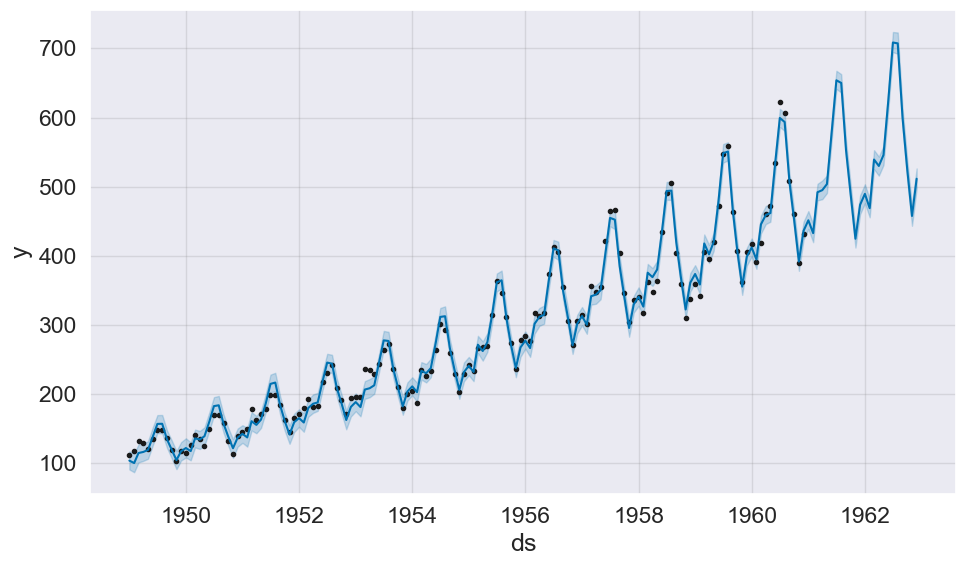

In [37]:
from prophet import Prophet

df = pd.read_excel('./Final ass.Bonus/air-passengers.xlsx')
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

In [38]:
#By adding m = Prophet(seasonality_mode='multiplicative') also the growth of n.passengers over time is visible by seeing the chart.
#The multiplicative method produce a better quality and fit of the model since stagionality and trend increase proportionally in the time serie.